## Euclidean and Manhattan Distance Calculations

While working on this quick case study, you'll see examples and comparisons of distance measures. Specifically, you'll visually compare the Euclidean distance to the Manhattan distance measures. Distance measures have a multitude of uses in data science and are the foundations of many algorithms you'll be using, including Prinical Components Analysis.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
plt.style.use('ggplot')

In [8]:
# Load Course Numerical Dataset
df = pd.read_csv('distance_dataset (1).csv',index_col=0)
df.head()

,X,Y,Z,ClusterID
0,5.135779,4.167542,5.787635,4
1,4.280721,5.770909,6.091044,4
2,8.329098,7.540436,3.247239,2
3,5.470224,5.069249,5.768313,4
4,2.381797,2.402374,3.879101,1


### Euclidean Distance

Let's visualize the difference between the Euclidean and Manhattan distance.

Please use pandas to load the dataset .CSV file and Numpy to compute the __Euclidean distance__ to the point (Y=5, Z=5) that we've chosen as a reference. On the left, note the dataset projected onto the YZ plane and color coded per the Euclidean distance we just computed. As we are used to, points that lie at the same Euclidean distance define a regular 2D circle.

Note that the __SciPy library__ comes with optimized functions written in C to compute distances (in the scipy.spatial.distance module) that are much faster than our (naive) implementation.

In [4]:
# In the Y-Z plane, we compute the distance to ref point (5,5)
distEuclid = np.sqrt((df.Z - 5)**2 + (df.Y - 5)**2)

**<font color='teal'>Create a distance to reference point (3,3) matrix similar to the above example.</font>**

In [5]:
distEuclid33 = np.sqrt((df.Z - 3)**2 + (df.Y - 3)**2)

**<font color='teal'>Replace the value set to 'c' in the plotting cell below with your own distance matrix and review the result to deepen your understanding of Euclidean distances. </font>**

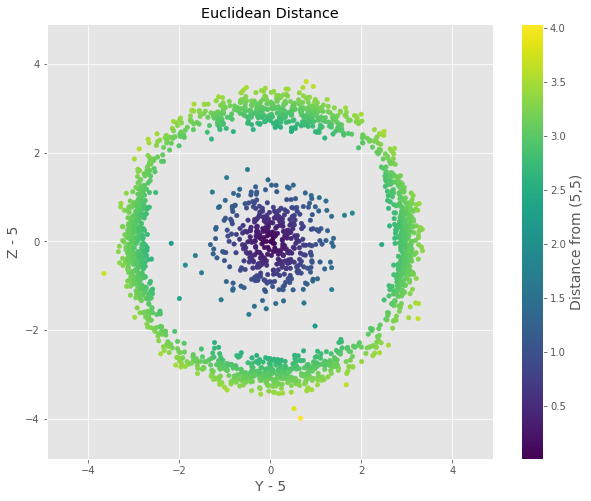

In [7]:
figEuclid = plt.figure(figsize=[10,8])

plt.scatter(df.Y - 5, df.Z-5, c=distEuclid, s=20)
plt.ylim([-4.9,4.9])
plt.xlim([-4.9,4.9])
plt.xlabel('Y - 5', size=14)
plt.ylabel('Z - 5', size=14)
plt.title('Euclidean Distance')
cb = plt.colorbar()
cb.set_label('Distance from (5,5)', size=14)

#figEuclid.savefig('Euclidean.png')

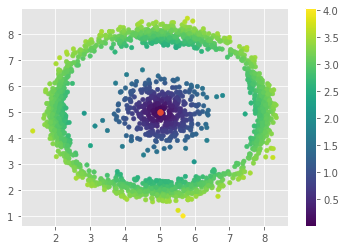

In [26]:
#plt.figure(figsize=[8,8])
plt.scatter(df.Y, df.Z,c=distEuclid, s=20)
plt.colorbar()
plt.scatter(5,5);

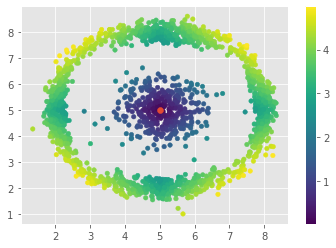

In [30]:
distMan = np.abs(df.Z - 5) + np.abs(df.Y - 5)
plt.scatter(df.Y, df.Z,c=distMan, s=20)
plt.colorbar()
plt.scatter(5,5);

### Manhattan Distance

Manhattan distance is simply the sum of absolute differences between the points coordinates. This distance is also known as the taxicab or city block distance as it measures distances along the coorinate axis, which creates "paths" that look like a cab's route on a grid-style city map.

We display the dataset projected on the XZ plane here color coded per the Manhattan distance to the (X=5, Z=5) reference point. We can see that points lying at the same distance define a circle that looks like a Euclidean square.

In [13]:
# In the Y-Z plane, we compute the distance to ref point (5,5)
distManhattan = np.abs(df.X - 5) + np.abs(df.Z - 5)

**<font color='teal'>Create a Manhattan distance to reference point (4,4) matrix similar to the above example and replace the value for 'c' in the plotting cell to view the result.</font>**

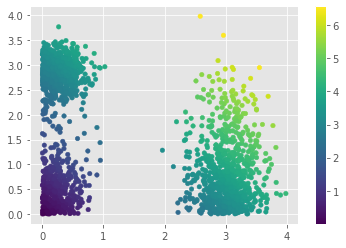

In [28]:
#plt.figure(figsize=[10,8])

plt.scatter(np.abs(df.X - 5), np.abs(df.Z-5), c=distManhattan, s=20)
plt.colorbar();

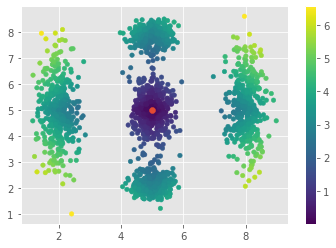

In [29]:
plt.scatter(df.X, df.Z, c=distManhattan, s=20)
plt.colorbar()
plt.scatter(5,5);

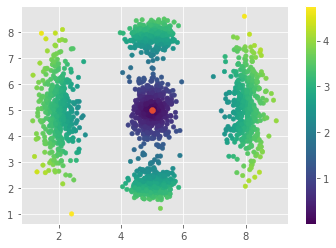

In [31]:
distEuc = np.sqrt((df.X - 5)**2 + (df.Z - 5)**2)
plt.scatter(df.X, df.Z,c=distEuc, s=20)
plt.colorbar()
plt.scatter(5,5);

Now let's create distributions of these distance metrics and compare them. We leverage the scipy dist function to create these matrices similar to how you manually created them earlier in the exercise.

In [9]:
import scipy.spatial.distance as dist

mat = df[['X','Y','Z']].values
DistEuclid = dist.pdist(mat,'euclidean')
DistManhattan = dist.pdist(mat, 'cityblock')
largeMat = np.random.random((10000,100))

**<font color='teal'>Plot histograms of each distance matrix for comparison.</font>**

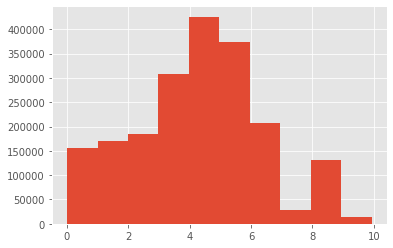

In [42]:
plt.hist(DistEuclid);

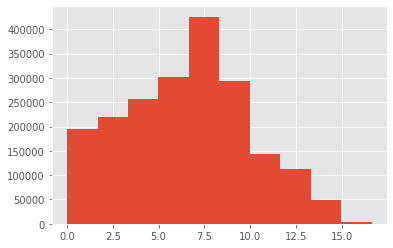

In [44]:
plt.hist(DistManhattan);

In [49]:
len(DistManhattan)

1999000

In [50]:
len(df)

2000

In [51]:
from scipy import spatial

In [54]:
from mpl_toolkits import mplot3d

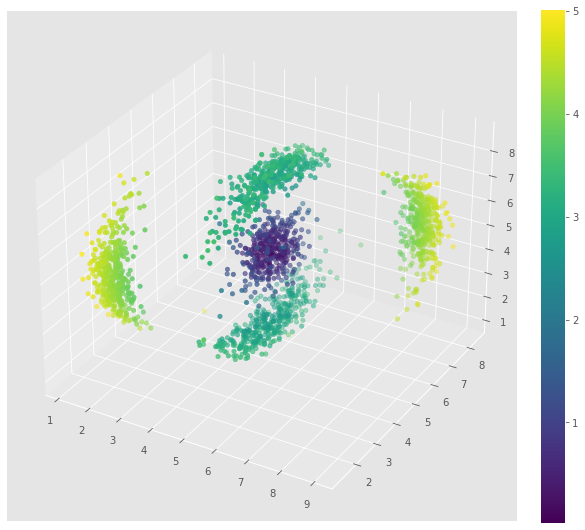

In [99]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d') 
c = dist.cdist(mat,[[5,5,5]],'euclidean')
p = ax.scatter3D(df.X, df.Y, df.Z, c=c)
ax.scatter3D(5,5,5,c='red',label='text')
#ax.text(5,5,5,'reference',c='white')
#plt.annotate('Reference Point',(5,5,5))
fig.colorbar(p,fraction=0.046, pad=0.04);

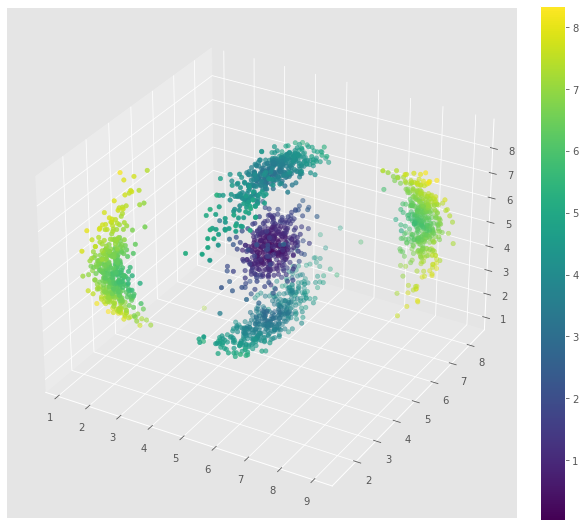

In [100]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d') 
c = dist.cdist(mat,[[5,5,5]],'cityblock')
p = ax.scatter3D(df.X, df.Y, df.Z, c=c)
ax.scatter3D(5,5,5,c='red',label='text')
#ax.text(5,5,5,'reference',c='white')
#plt.annotate('Reference Point',(5,5,5))
fig.colorbar(p,fraction=0.046, pad=0.04);

In [19]:
import scipy.spatial.distance as dist
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [9]:
x = []
y = []
points = []
for i in np.arange(0,10,0.1):
    for j in np.arange(0,10,0.1):
        x.append(i)
        y.append(j)
        points.append([i,j])

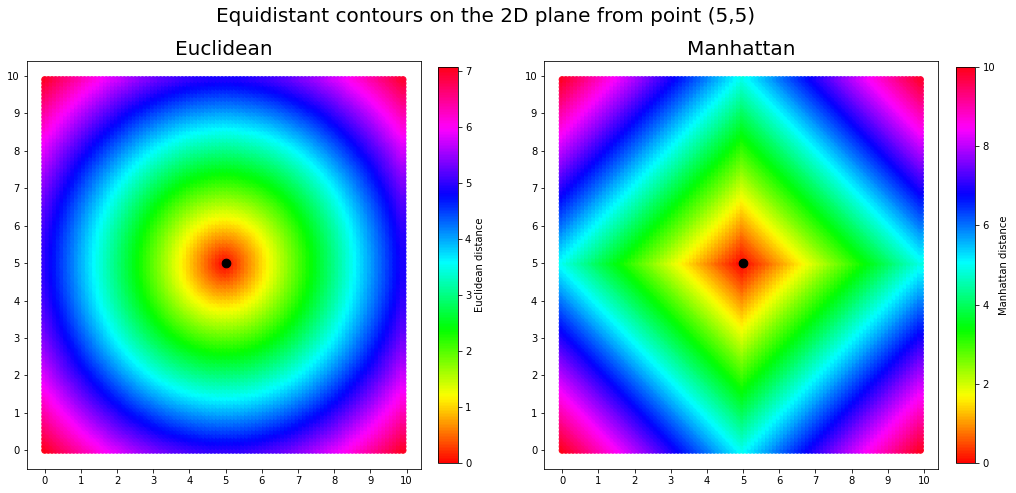

In [13]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(17,7.5))
c = dist.cdist(points,[[5,5]],'euclidean')
p=ax1.scatter(x,y, c=c,cmap ='hsv')
ax1.scatter(5,5,c='black',s=75)
ax1.set_xticks(range(0,11))
ax1.set_yticks(range(0,11))
plt.colorbar(p,fraction=0.046, pad=0.04,ax=ax1).set_label('Euclidean distance')
ax1.set_title('Euclidean',fontsize=20)

c = dist.cdist(points,[[5,5]],'cityblock')
p=ax2.scatter(x,y, c=c,cmap ='hsv')
ax2.scatter(5,5,c='black',s=75)
ax2.set_xticks(range(0,11))
ax2.set_yticks(range(0,11))
fig.colorbar(p,fraction=0.046, pad=0.04,ax=ax2).set_label('Manhattan distance')
ax2.set_title('Manhattan',fontsize=20)
fig.suptitle('Equidistant contours on the 2D plane from point (5,5)',fontsize=20);
#plt.tight_layout();

In [14]:
x = []
y = []
z = []
points = []
for i in np.arange(0,10,0.1):
    for j in np.arange(0,10,0.1):
        for k in np.arange(0,10,0.1):
            x.append(i)
            y.append(j)
            z.append(k)
            points.append([i,j,k])

In [23]:
df3d = pd.DataFrame(points,columns=['X','Y','Z'])

In [34]:
P = df3d[((df3d.X-5)**2+(df3d.Y-5)**2 <= 25) | ((df3d.X-5)**2+(df3d.Z-5)**2 <= 25) | ((df3d.Y-5)**2+(df3d.Z-5)**2 <= 25) ]

Text(0.5, 0.92, 'Euclidean')

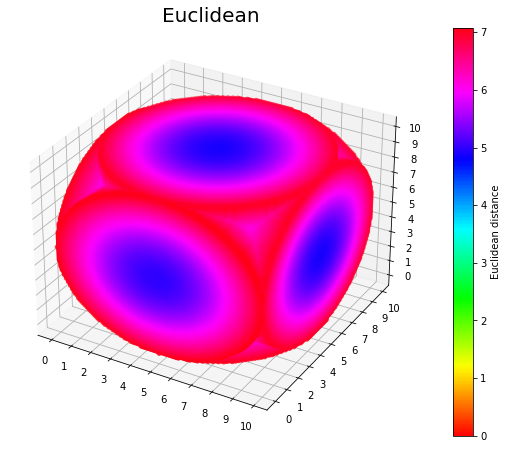

In [35]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(17,7.5))
ax1 = plt.axes(projection='3d') 
c = dist.cdist(P[['X','Y','Z']].values,[[5,5,5]],'euclidean')
p=ax1.scatter3D(P.X,P.Y,P.Z, c=c,cmap ='hsv')
ax1.scatter3D(5,5,5,c='black',s=75)
ax1.set_xticks(range(0,11))
ax1.set_yticks(range(0,11))
ax1.set_zticks(range(0,11))
plt.colorbar(p,fraction=0.046, pad=0.04,ax=ax1).set_label('Euclidean distance')
ax1.set_title('Euclidean',fontsize=20)

In [38]:
P = df3d[(abs(df3d.X-5)+abs(df3d.Y-5) <= 5) | (abs(df3d.X-5)+abs(df3d.Z-5) <= 5) | (abs(df3d.Y-5)+abs(df3d.Z-5) <= 5) ]

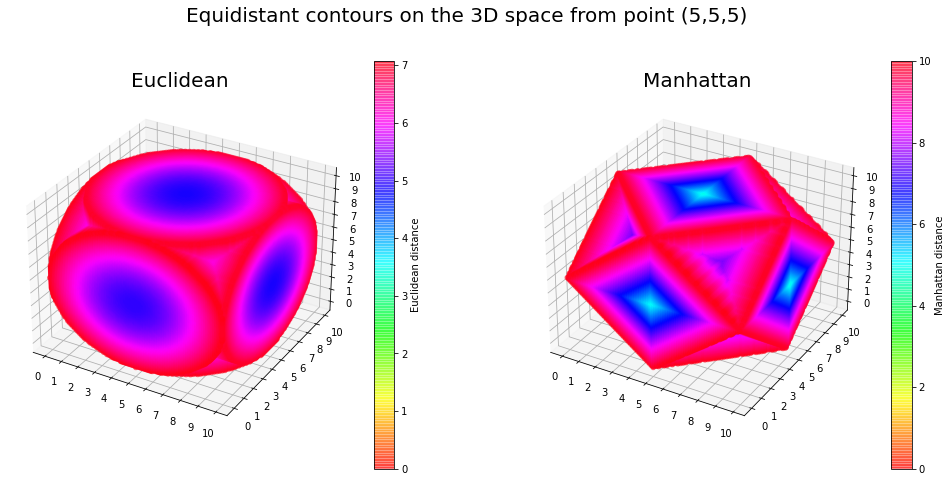

In [48]:
P = df3d[((df3d.X-5)**2+(df3d.Y-5)**2 <= 25) | ((df3d.X-5)**2+(df3d.Z-5)**2 <= 25) | ((df3d.Y-5)**2+(df3d.Z-5)**2 <= 25) ]
fig= plt.figure(figsize=(17,7.5))
ax1 = fig.add_subplot(1,2,1,projection='3d') 
c = dist.cdist(P.values,[[5,5,5]],'euclidean')
p1=ax1.scatter3D(P.X,P.Y,P.Z, c=c,cmap ='hsv',alpha=0.5)
ax1.scatter3D(5,5,5,c='black',s=75)
ax1.set_xticks(range(0,11))
ax1.set_yticks(range(0,11))
ax1.set_zticks(range(0,11))
fig.colorbar(p1,ax=ax1).set_label('Euclidean distance')
ax1.set_title('Euclidean',fontsize=20)

P = df3d[(abs(df3d.X-5)+abs(df3d.Y-5) <= 5) | (abs(df3d.X-5)+abs(df3d.Z-5) <= 5) | (abs(df3d.Y-5)+abs(df3d.Z-5) <= 5) ]
ax2 = fig.add_subplot(1,2,2,projection='3d')
c = dist.cdist(P.values,[[5,5,5]],'cityblock')
p2=ax2.scatter3D(P.X,P.Y,P.Z, c=c,cmap ='hsv',alpha=0.5)
ax2.scatter3D(5,5,5,c='black',s=75)
ax2.set_xticks(range(0,11))
ax2.set_yticks(range(0,11))
ax2.set_zticks(range(0,11))
fig.colorbar(p2,ax=ax2).set_label('Manhattan distance')
ax2.set_title('Manhattan',fontsize=20)

fig.suptitle('Equidistant contours on the 3D space from point (5,5,5)',fontsize=20);
#plt.tight_layout();

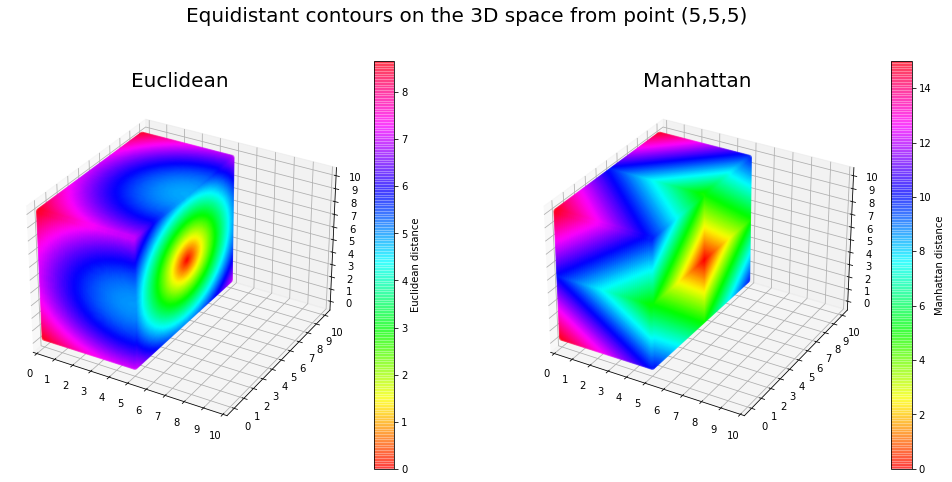

In [51]:
P = df3d[df3d.X<=5]
fig= plt.figure(figsize=(17,7.5))
ax1 = fig.add_subplot(1,2,1,projection='3d') 
c = dist.cdist(P.values,[[5,5,5]],'euclidean')
p1=ax1.scatter3D(P.X,P.Y,P.Z, c=c,cmap ='hsv',alpha=0.5)
ax1.scatter3D(5,5,5,c='black',s=75)
ax1.set_xticks(range(0,11))
ax1.set_xlim([0,10])
ax1.set_yticks(range(0,11))
ax1.set_zticks(range(0,11))
fig.colorbar(p1,ax=ax1).set_label('Euclidean distance')
ax1.set_title('Euclidean',fontsize=20)

P = df3d[df3d.X<=5]
ax2 = fig.add_subplot(1,2,2,projection='3d')
c = dist.cdist(P.values,[[5,5,5]],'cityblock')
p2=ax2.scatter3D(P.X,P.Y,P.Z, c=c,cmap ='hsv',alpha=0.5)
ax2.scatter3D(5,5,5,c='black',s=75)
ax2.set_xticks(range(0,11))
ax2.set_xlim([0,10])
ax2.set_yticks(range(0,11))
ax2.set_zticks(range(0,11))
fig.colorbar(p2,ax=ax2).set_label('Manhattan distance')
ax2.set_title('Manhattan',fontsize=20)

fig.suptitle('Equidistant contours on the 3D space from point (5,5,5)',fontsize=20);
#plt.tight_layout();

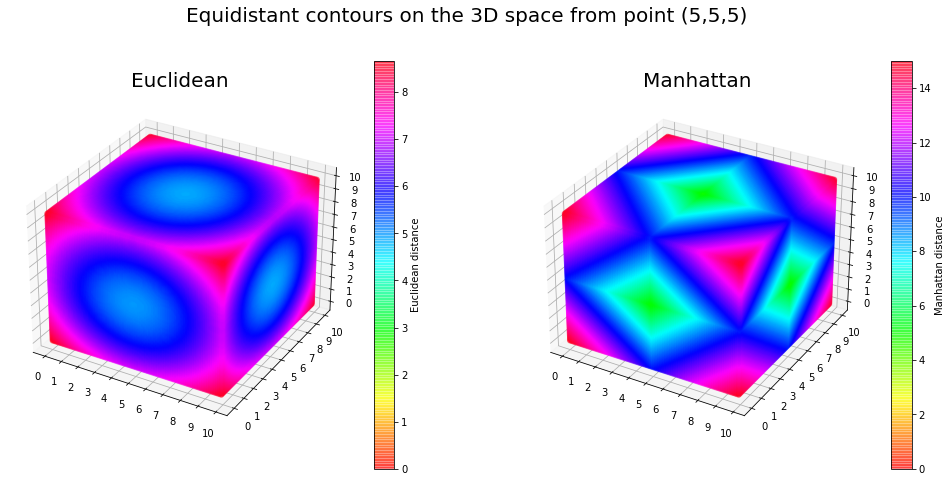

In [47]:
fig= plt.figure(figsize=(17,7.5))
ax1 = fig.add_subplot(1,2,1,projection='3d') 
c = dist.cdist(df3d.values,[[5,5,5]],'euclidean')
p1=ax1.scatter3D(df3d.X,df3d.Y,df3d.Z, c=c,cmap ='hsv',alpha=0.5)
ax1.scatter3D(5,5,5,c='black',s=75)
ax1.set_xticks(range(0,11))
ax1.set_yticks(range(0,11))
ax1.set_zticks(range(0,11))
fig.colorbar(p1,ax=ax1).set_label('Euclidean distance')
ax1.set_title('Euclidean',fontsize=20)

c = dist.cdist(df3d.values,[[5,5,5]],'cityblock')
ax2 = fig.add_subplot(1,2,2,projection='3d')
p2=ax2.scatter3D(df3d.X,df3d.Y,df3d.Z, c=c,cmap ='hsv',alpha=0.5)
ax2.scatter3D(5,5,5,c='black',s=75)
ax2.set_xticks(range(0,11))
ax2.set_yticks(range(0,11))
ax2.set_zticks(range(0,11))
fig.colorbar(p2,ax=ax2).set_label('Manhattan distance')
ax2.set_title('Manhattan',fontsize=20)

fig.suptitle('Equidistant contours on the 3D space from point (5,5,5)',fontsize=20);
#plt.tight_layout();